In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from patsy import dmatrices

In [7]:
df = pd.read_csv('./csv파일/데이터셋_3(심각도).csv',encoding='cp949')

In [8]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자,도로종류,도로형태,도로선형,발생시각,심각도
0,보도통행중,20세이하,그룹1,그룹2,그룹4,그룹5,기타,단일로,평지,낮,0
1,횡단중,65세이상,그룹1,그룹2,그룹5,그룹4,시도,단일로,평지,출퇴근시간,1
2,길가장자리구역통행중,20세이하,그룹1,그룹2,기타/불명,그룹4,시도,단일로,평지,출퇴근시간,0
3,길가장자리구역통행중,21-30세,그룹1,그룹1,기타/불명,그룹1,기타,단일로,평지,낮,1
4,횡단중,41-50세,그룹1,그룹2,그룹5,그룹4,기타,단일로,평지,낮,1
...,...,...,...,...,...,...,...,...,...,...,...
58054,길가장자리구역통행중,51-60세,그룹1,그룹2,그룹2,그룹4,시도,단일로,평지,낮,0
58055,보도통행중,21-30세,기타,그룹1,그룹2,그룹4,군도,교차로,평지,출퇴근시간,0
58056,차도통행중,31-40세,그룹1,그룹2,그룹4,그룹4,군도,단일로,평지,출퇴근시간,1
58057,기타,65세이상,그룹1,그룹2,그룹4,그룹4,시도,단일로,평지,출퇴근시간,1


In [9]:
x=df.drop(['심각도'],axis=1)
x = pd.get_dummies(x)
y=pd.DataFrame(df['심각도'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,shuffle=True) 

In [10]:
log = LogisticRegression()
log.fit(x_train,y_train)

y_pred = log.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.18      0.28      5754
           1       0.70      0.94      0.80     11664

    accuracy                           0.69     17418
   macro avg       0.65      0.56      0.54     17418
weighted avg       0.67      0.69      0.63     17418



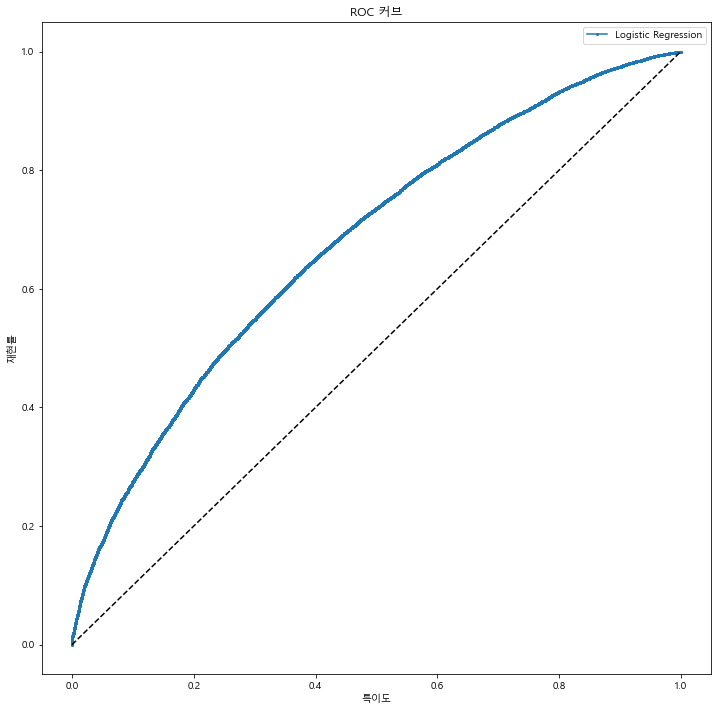

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12,12


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fpr, tpr, threshold = roc_curve(y_train, log.decision_function(x_train))

plt.plot(fpr,tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0,1],[0,1], 'k--',label='radom guess')
plt.xlabel('특이도')
plt.ylabel('재현률')
plt.title('ROC 커브')
plt.show()

#### AUC 값은 0.5~1의 범위를 가지는데 0.5면 성능이 전혀 없음. 1이면 최고의 성능이라고 할 수 있다.

In [13]:
print('AUC: {}'.format(auc(fpr,tpr)))  # 0.5에 가까울 수록 성능이 좋지 못함

AUC: 0.6773439816964419


#### 위 과정을 통해 로지스틱 회귀 모델을 생성하고 평가

In [14]:
import statsmodels.api as sm

logit = sm.Logit(y,x)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.589385
         Iterations 9


In [15]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                58059
Model:                          Logit   Df Residuals:                    58011
Method:                           MLE   Df Model:                           47
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                 0.07103
Time:                        14:39:54   Log-Likelihood:                -34219.
converged:                       True   LL-Null:                       -36836.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
사고유형_기타              0.0270        nan        nan        nan         nan         nan
사고유형_길가장자리구역통행중     -0.0362        nan        nan        nan         nan         nan
사고유형_보도통행중           0.1704 

In [16]:
print(np.exp(result.params))

사고유형_기타              1.027318
사고유형_길가장자리구역통행중      0.964441
사고유형_보도통행중           1.185802
사고유형_차도통행중           1.171496
사고유형_횡단중             1.464087
연령가해자_20세이하          1.271466
연령가해자_21-30세         1.264782
연령가해자_31-40세         1.235720
연령가해자_41-50세         1.285383
연령가해자_51-60세         1.234498
연령가해자_61-64세         1.212064
연령가해자_65세이상          1.250133
연령가해자_기타/불명          0.421751
법규위반가해자_그룹1          0.546666
법규위반가해자_그룹2          0.601124
법규위반가해자_그룹3         11.224520
법규위반가해자_기타           0.546319
행동유형가해자_그룹1          1.160348
행동유형가해자_그룹2          1.538426
행동유형가해자_그룹3          1.370212
행동유형가해자_그룹4          0.730837
행동유형가해자_기타/불명        1.127269
피해자신체상해주부위_그룹1       0.350275
피해자신체상해주부위_그룹2       0.571579
피해자신체상해주부위_그룹3       0.940322
피해자신체상해주부위_그룹4       1.409937
피해자신체상해주부위_그룹5       1.984731
피해자신체상해주부위_그룹6       3.498991
피해자신체상해주부위_기타/불명     1.093185
차량용도가해자_그룹1          1.529124
차량용도가해자_그룹2          1.178432
차량용도가해자_그룹3          1.125367
차량용도가해자_그룹4          1.258028
차량용도가해자_그룹

#### 오즈비 1 이 넘지 않는  것 삭제 후 다시

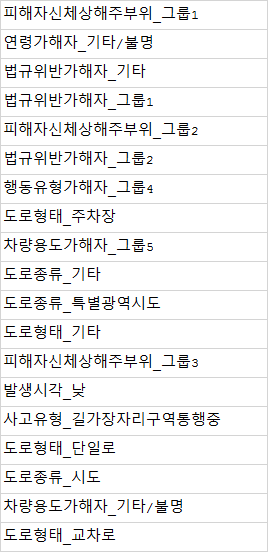

In [19]:
x2 = x.drop(['피해자신체상해주부위_그룹1','연령가해자_기타/불명','법규위반가해자_기타','법규위반가해자_그룹1'
            ,'피해자신체상해주부위_그룹2','법규위반가해자_그룹2','행동유형가해자_그룹4','도로형태_주차장','차량용도가해자_그룹5'
            ,'도로종류_기타','도로종류_특별광역시도','도로형태_기타','피해자신체상해주부위_그룹3','발생시각_낮','사고유형_길가장자리구역통행중'
            ,'도로형태_단일로','도로종류_시도','차량용도가해자_기타/불명','도로형태_교차로'],axis=1)

In [20]:
logit = sm.Logit(y,x2)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.591709
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                58059
Model:                          Logit   Df Residuals:                    58021
Method:                           MLE   Df Model:                           37
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                 0.06737
Time:                        14:51:36   Log-Likelihood:                -34354.
converged:                       True   LL-Null:                       -36836.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
사고유형_기타              0.0754      0.038      2.007      0.045       0.002       0.149
사고유형_보도통행중 

#### 독립변수들의 오즈비를 구해보자
#### 오즈비는 1을 기준으로 1보다 크면 심각한사고일 확률이 커지고 1보다 작으면 심각하지 않은 사고 일 확률이 커진다는 것을 나타낸다. 
#### 오즈비가 1 이면 결과에 별다른 영향을 미치지 않는 다고 볼 수 있다.
#### 회귀계수가 변수의 오즈비의 로그값이므로 exp을 취해서 보자

In [21]:
print(np.exp(result.params))

사고유형_기타              1.078317
사고유형_보도통행중           1.279345
사고유형_차도통행중           1.234806
사고유형_횡단중             1.612918
연령가해자_20세이하          2.598837
연령가해자_21-30세         2.582775
연령가해자_31-40세         2.525652
연령가해자_41-50세         2.630087
연령가해자_51-60세         2.527180
연령가해자_61-64세         2.473776
연령가해자_65세이상          2.561187
법규위반가해자_그룹3         19.812178
행동유형가해자_그룹1          1.587054
행동유형가해자_그룹2          2.106367
행동유형가해자_그룹3          1.940263
행동유형가해자_기타/불명        1.600571
피해자신체상해주부위_그룹4       1.739635
피해자신체상해주부위_그룹5       2.462258
피해자신체상해주부위_그룹6       4.353010
피해자신체상해주부위_기타/불명     1.349082
차량용도가해자_그룹1          1.927485
차량용도가해자_그룹2          1.497895
차량용도가해자_그룹3          1.399145
차량용도가해자_그룹4          1.592029
도로종류_고속국도            1.686532
도로종류_군도              1.296967
도로종류_일반국도            1.460998
도로종류_지방도             1.270566
도로형태_기타/불명           1.069316
도로형태_불명              2.762901
도로선형_기타/서비스구역        0.095144
도로선형_내리막             0.135866
도로선형_오르막             0.115804
도로선형_평지   